# Séries temporais 1

Na aula de hoje, vamos explorar os seguintes tópicos em Python:

- 1) Introdução
- 2) Séries temporais


_____
_____
_____

Instale as seguintes bibliotecas:

In [2]:
# !pip install yfinance

In [3]:
# !pip install plotly==3.7.1

_____
_____
_____

## 1) Introdução

Iniciaremos agora nossos estudos de séries temporais.

Inicialmente, vamos entender **o que é uma série temporal**, para depois chegarmos ao ponto de **fazer previsões de pontos futuros**.

Antes de começarmos, é prudente que tenhamos a seguinte [citação](https://quoteinvestigator.com/tag/niels-bohr/) em mente:

## _"It’s difficult to make predictions. Especially about the future."_

__________
________
______

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

%matplotlib inline

Nessa aula, vamos utilizar o [yahoo finance](https://pypi.org/project/yfinance/), um módulo integrado ao pandas que nos auxiliará a captar dados financeiros da internet.

In [5]:
import yfinance as yf

____
____
____

## 2) Séries temporais

Uma **série temporal** nada mais é que **um conjunto de valores sequenciais temporalmente indexados**.

Séries temporais aparecem em diversos contextos, e o principal objetivo de seu estudo é o de conseguir **caputrar estrutura adicional** na indexação sequencial/temporal, como, por exemplo, padrões que se reptem periodicamente.

A **análise de séries temporais** nos proporciona ferramentas para:

- Descrever o comportamento da série;

- Encontrar periodicidades;

- Obter possíveis explicações para o comportamento da série, geralmente através de variáveis auxiliares;

- Predizer o comportamento futuro, o que possibilita fazer planos a longo, médio ou curto prazo e tomar decisões apropriadas.

Vamos começar a estudar estas ferramentas em Python!

Nesta aula, usaremos como fonte de dados o portal **Yahoo Finance** (https://finance.yahoo.com/).

Para consultar a série temporal **dos preços de algum ativo**, basta identificar qual é o seu **símbolo** no site acima. No caso de ações, temos os tickers.

No nosso exemplo, vamos olhar pras ações da Cielo:

In [31]:
ticker = 'CIEL3.SA'

df = yf.download(ticker, start='2010-01-01')

df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.695963,7.937089,7.635681,7.937089,5.238292,7856713
2010-01-05,7.911972,7.962207,7.756244,7.881831,5.201823,4355949
2010-01-06,7.836620,7.911972,7.786385,7.861737,5.188561,10207675
2010-01-07,7.796432,8.148075,7.786385,8.047606,5.311231,17911904
2010-01-08,8.067700,8.213381,7.937089,7.947136,5.244923,8385032
...,...,...,...,...,...,...
2021-08-05,3.420000,3.470000,3.380000,3.380000,3.356433,19552200
2021-08-06,3.380000,3.430000,3.340000,3.400000,3.400000,18803400
2021-08-09,3.390000,3.450000,3.370000,3.380000,3.380000,11235700


Note que o yfinance produz automaticamente um dataframe com as datas **como os índices**

Isso ajuda muito na hora de fazermos os plots, e também nos filtros:

In [32]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [33]:
df.index

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2021-07-29', '2021-07-30', '2021-08-02', '2021-08-03',
               '2021-08-04', '2021-08-05', '2021-08-06', '2021-08-09',
               '2021-08-10', '2021-08-11'],
              dtype='datetime64[ns]', name='Date', length=2868, freq=None)

In [34]:
df.loc["2019":]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,9.00,9.76,8.96,9.63,8.702098,13911000
2019-01-03,9.63,9.82,9.27,9.40,8.494261,19546800
2019-01-04,9.47,10.28,9.41,10.15,9.171993,22738400
2019-01-07,10.26,10.44,9.92,10.06,9.090667,13294800
2019-01-08,10.13,10.24,9.67,9.72,8.783425,18199700
...,...,...,...,...,...,...
2021-08-05,3.42,3.47,3.38,3.38,3.356433,19552200
2021-08-06,3.38,3.43,3.34,3.40,3.400000,18803400
2021-08-09,3.39,3.45,3.37,3.38,3.380000,11235700


In [35]:
df.loc["2019-12-15":]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-16,8.75,8.93,8.24,8.33,8.035580,24671600
2019-12-17,8.27,8.80,8.27,8.79,8.479322,20224500
2019-12-18,8.83,9.07,8.66,8.74,8.431087,21490200
2019-12-19,8.76,8.79,8.45,8.54,8.238158,19795500
2019-12-20,8.55,8.55,8.43,8.47,8.170631,17099800
...,...,...,...,...,...,...
2021-08-05,3.42,3.47,3.38,3.38,3.356433,19552200
2021-08-06,3.38,3.43,3.34,3.40,3.400000,18803400
2021-08-09,3.39,3.45,3.37,3.38,3.380000,11235700


In [36]:
df.loc["2011":"2012"]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-01-03,6.857042,6.902254,6.776667,6.831925,4.514042,3994446
2011-01-04,6.816855,6.826902,6.590798,6.671174,4.407828,7311074
2011-01-05,6.630986,6.681221,6.620939,6.630986,4.381275,5381932
2011-01-06,6.641033,6.656103,6.535540,6.580751,4.348083,8228169
2011-01-07,6.565681,6.590798,6.485305,6.525493,4.311574,8671686
...,...,...,...,...,...,...
2012-12-20,13.286072,13.319830,13.069058,13.261959,9.538995,4788771
2012-12-21,13.088348,13.346354,13.073881,13.261959,9.538995,7293680
2012-12-26,13.261959,13.500675,13.107638,13.216145,9.506037,8614563


In [37]:
df.loc["2019-12-15":"2021-07-07"]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-16,8.75,8.93,8.24,8.33,8.035580,24671600
2019-12-17,8.27,8.80,8.27,8.79,8.479322,20224500
2019-12-18,8.83,9.07,8.66,8.74,8.431087,21490200
2019-12-19,8.76,8.79,8.45,8.54,8.238158,19795500
2019-12-20,8.55,8.55,8.43,8.47,8.170631,17099800
...,...,...,...,...,...,...
2021-07-01,3.65,3.66,3.58,3.61,3.584829,22022400
2021-07-02,3.64,3.67,3.59,3.63,3.604690,16097700
2021-07-05,3.64,3.68,3.60,3.65,3.624551,12312400


Sempre que formos trabalhar com preços de ativos, é importante que trabalhemos com o **preço ajustado**, que nada mais é que o preço acrescido do pagamento de dividendos.

In [38]:
df["Adj Close"]

Date
2010-01-04    5.238292
2010-01-05    5.201823
2010-01-06    5.188561
2010-01-07    5.311231
2010-01-08    5.244923
                ...   
2021-08-05    3.356433
2021-08-06    3.400000
2021-08-09    3.380000
2021-08-10    3.340000
2021-08-11    3.320000
Name: Adj Close, Length: 2868, dtype: float64

In [39]:
precos = df["Adj Close"]

In [40]:
precos.loc["2020-03":]

Date
2020-03-02    6.855597
2020-03-03    6.971793
2020-03-04    7.136405
2020-03-05    6.661936
2020-03-06    6.352078
                ...   
2021-08-05    3.356433
2021-08-06    3.400000
2021-08-09    3.380000
2021-08-10    3.340000
2021-08-11    3.320000
Name: Adj Close, Length: 358, dtype: float64

In [41]:
precos

Date
2010-01-04    5.238292
2010-01-05    5.201823
2010-01-06    5.188561
2010-01-07    5.311231
2010-01-08    5.244923
                ...   
2021-08-05    3.356433
2021-08-06    3.400000
2021-08-09    3.380000
2021-08-10    3.340000
2021-08-11    3.320000
Name: Adj Close, Length: 2868, dtype: float64

In [42]:
precos.describe()

count    2868.000000
mean       11.814228
std         6.310686
min         3.195405
25%         5.574331
50%        10.302621
75%        18.124051
max        24.439804
Name: Adj Close, dtype: float64

In [46]:
precos.idxmin()

Timestamp('2020-11-03 00:00:00')

In [47]:
precos.idxmax()

Timestamp('2015-07-21 00:00:00')

________

### 2.1) Plotando séries temporais

A forma mais simples de plotar uma série temporal é através do método `plot()` do próprio pandas.

In [49]:
precos

Date
2010-01-04    5.238292
2010-01-05    5.201823
2010-01-06    5.188561
2010-01-07    5.311231
2010-01-08    5.244923
                ...   
2021-08-05    3.356433
2021-08-06    3.400000
2021-08-09    3.380000
2021-08-10    3.340000
2021-08-11    3.320000
Name: Adj Close, Length: 2868, dtype: float64

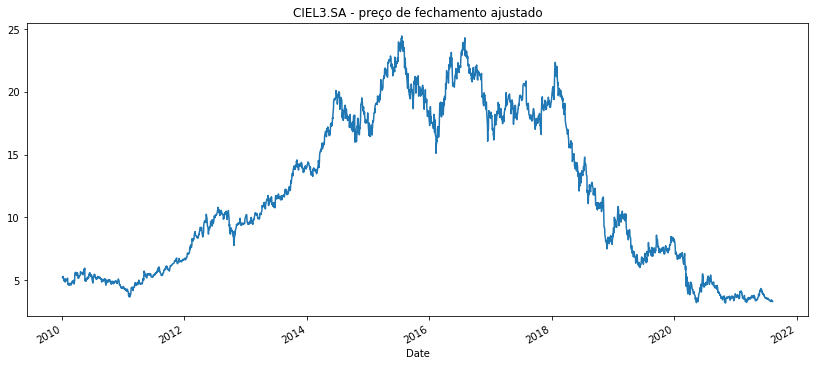

In [50]:
# plotanto o preço de fechamento ajustado

plt.figure(figsize=(14, 6))
plt.title(f"{ticker} - preço de fechamento ajustado")

# plot com o pandas
precos.plot()

plt.show()

Outra forma (um pouco mais flexível) é utilizando o seaborn

In [51]:
precos.index

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2021-07-29', '2021-07-30', '2021-08-02', '2021-08-03',
               '2021-08-04', '2021-08-05', '2021-08-06', '2021-08-09',
               '2021-08-10', '2021-08-11'],
              dtype='datetime64[ns]', name='Date', length=2868, freq=None)

In [53]:
precos.values

array([5.23829174, 5.20182323, 5.18856144, ..., 3.38000011, 3.33999991,
       3.31999993])

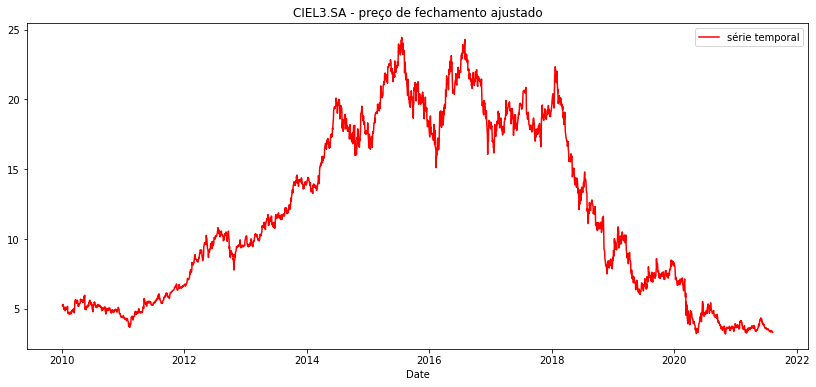

In [54]:
plt.figure(figsize=(14, 6))
plt.title(f"{ticker} - preço de fechamento ajustado")

# plot com o seaborn
sns.lineplot(x=precos.index, y=precos.values, label="série temporal", color="red")

plt.legend()
plt.show()

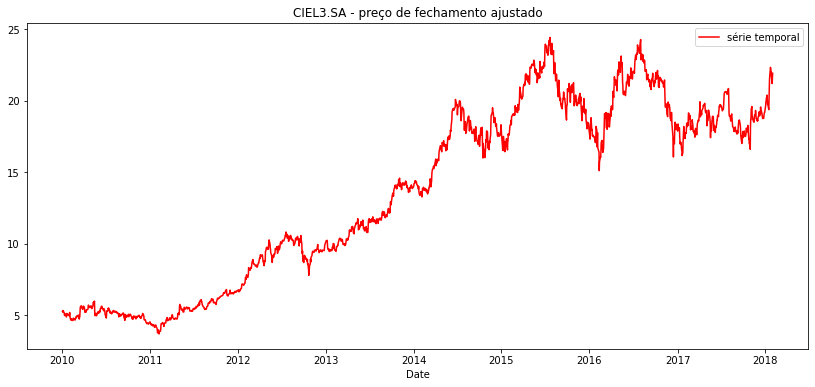

In [59]:
plt.figure(figsize=(14, 6))
plt.title(f"{ticker} - preço de fechamento ajustado")

# plot com o seaborn
sns.lineplot(x=precos.loc[:"2018-01"].index, y=precos.loc[:"2018-01"].values, label="série temporal", color="red")

plt.legend()
plt.show()

Há ainda, a possibilidade de utilizar a biblioteca [plotly](https://plotly.com/python/), que produz gráficos interativos muito interessantes!

Obs.: instale a biblioteca conforme `pip install plotly==3.7.1`

In [57]:
import plotly
import plotly.graph_objs as go
from plotly.offline import *

# pra plotar no jupyter
init_notebook_mode(connected=True)
    
# definindo os dados a serem plotados (note os índices no eixo x)
data = [go.Scatter(x=precos.index, y = precos.values)]

# definindo os botões interativos
botoes = {"buttons" : [{"count" : 1, "label" : "1m", "step" : "month", "stepmode" : "backward"},
                       {"count" : 6, "label" : "6m", "step" : "month", "stepmode" : "backward"},
                       {"count" : 12, "label" : "12m", "step" : "month", "stepmode" : "backward"},
                       {"step" : "all"}]
         }

# definindo o eixo x com a interatividade: botões e uma janela deslizante
eixo_x = {"rangeselector" : botoes,
          "rangeslider" : {"visible" : True}
         }

# definindo o layout
layout = {"title" : f"{ticker} - preço de fechamento ajustado",
          "xaxis" : eixo_x}

# dicionario final para o plot
fig = {"data" : data, "layout" : layout}

# fazendo o plot
plotly.offline.iplot(fig)

_______

### 2.2) Janelas deslizantes

É muito comum que séries temporais de preços de ativos financeiros apresentem grandes oscilações, como esta que estamos estudando.

Para eliminar estas variações e **suavizar** a série temporal, de modo que possa ser mais simples observar tendências e movimentos, é comum utilizarmos a técnica de **janela de média móvel (deslizante)**, que consiste em substituir os valores ao fim da janela pela **média** dos valores da janela imediatamente anterior.

É muito simples fazer isso com o pandas, utilizando o método `rolling`:

In [73]:
precos.head(10)

Date
2010-01-04    5.238292
2010-01-05    5.201823
2010-01-06    5.188561
2010-01-07    5.311231
2010-01-08    5.244923
2010-01-11    5.171985
2010-01-12    5.016161
2010-01-13    4.956484
2010-01-14    5.022794
2010-01-15    5.029426
Name: Adj Close, dtype: float64

In [72]:
precos.iloc[1:4].mean()

5.233871936798096

In [69]:
precos.rolling(window='3D').mean().head(10)

Date
2010-01-04    5.238292
2010-01-05    5.220057
2010-01-06    5.209559
2010-01-07    5.233872
2010-01-08    5.248239
2010-01-11    5.171985
2010-01-12    5.094073
2010-01-13    5.048210
2010-01-14    4.998480
2010-01-15    5.002901
Name: Adj Close, dtype: float64

In [75]:
# janela deslizante de 30 dias

precos.rolling(window='30D').mean()

Date
2010-01-04    5.238292
2010-01-05    5.220057
2010-01-06    5.209559
2010-01-07    5.234977
2010-01-08    5.236966
                ...   
2021-08-05    3.447224
2021-08-06    3.439368
2021-08-09    3.433398
2021-08-10    3.429152
2021-08-11    3.419823
Name: Adj Close, Length: 2868, dtype: float64

Vamos plotar a série suavizada com a série original para compararmos:

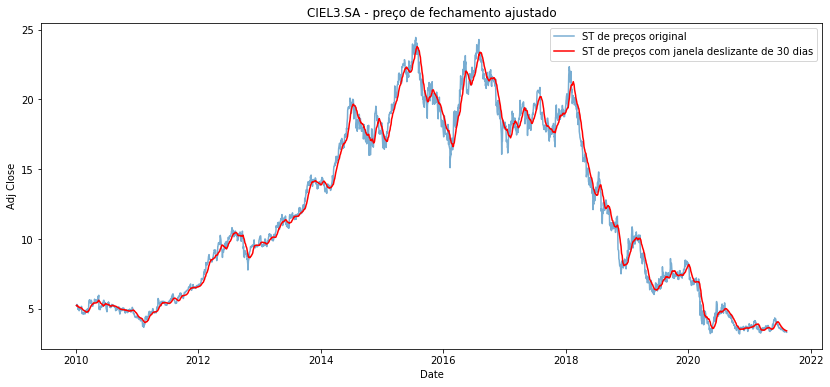

In [76]:
plt.figure(figsize=(14, 6))
plt.title(f"{ticker} - preço de fechamento ajustado")

sns.lineplot(x=precos.index, y=precos, label="ST de preços original", alpha=0.6)

precos_30d = precos.rolling(window='30D').mean()
sns.lineplot(x=precos_30d.index, y=precos_30d, 
             label="ST de preços com janela deslizante de 30 dias", color="red")

plt.legend()
plt.show()

Comparando diferentes janelas:

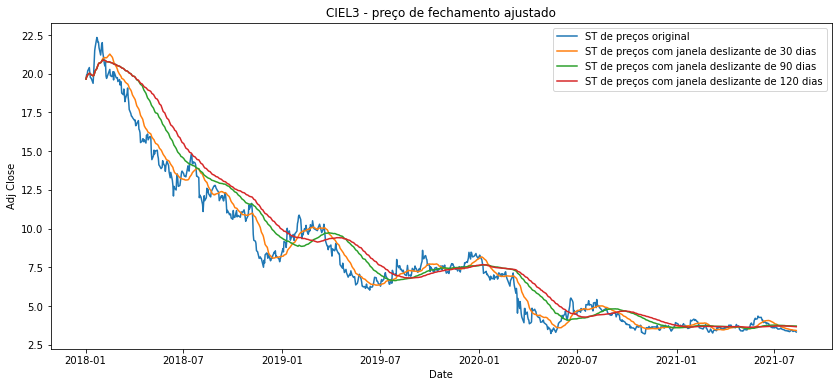

In [81]:
plt.figure(figsize=(14, 6))
plt.title("CIEL3 - preço de fechamento ajustado")

# série original
sns.lineplot(x=precos.loc["2018":].index, y=precos.loc["2018":], label="ST de preços original")

precos_30d = precos.loc["2018":].rolling(window='30D').mean()
sns.lineplot(x=precos_30d.index, y=precos_30d, label="ST de preços com janela deslizante de 30 dias")

precos_90d = precos.loc["2018":].rolling(window='90D').mean()
sns.lineplot(x=precos_90d.index, y=precos_90d, label="ST de preços com janela deslizante de 90 dias")

precos_120d = precos.loc["2018":].rolling(window='120D').mean()
sns.lineplot(x=precos_120d.index, y=precos_120d, label="ST de preços com janela deslizante de 120 dias")

plt.legend()
plt.show()

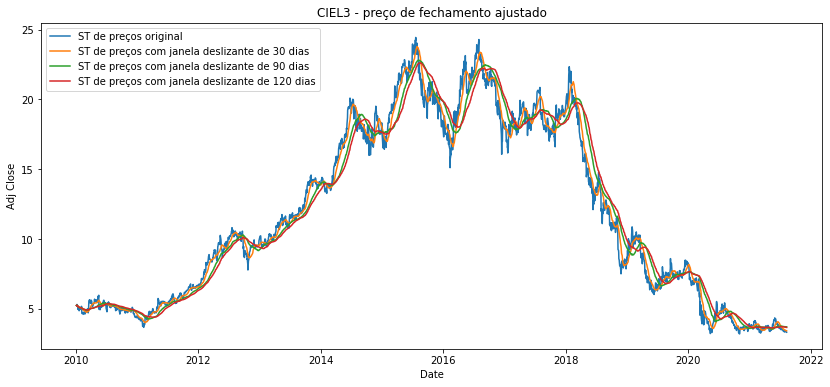

In [83]:
plt.figure(figsize=(14, 6))
plt.title("CIEL3 - preço de fechamento ajustado")

# série original
sns.lineplot(x=precos.index, y=precos, label="ST de preços original")

precos_30d = precos.rolling(window='30D').mean()
sns.lineplot(x=precos_30d.index, y=precos_30d, label="ST de preços com janela deslizante de 30 dias")

precos_90d = precos.rolling(window='90D').mean()
sns.lineplot(x=precos_90d.index, y=precos_90d, label="ST de preços com janela deslizante de 90 dias")

precos_120d = precos.rolling(window='120D').mean()
sns.lineplot(x=precos_120d.index, y=precos_120d, label="ST de preços com janela deslizante de 120 dias")

plt.legend()
plt.show()

Com o plotly:

In [86]:
# definindo os dados a serem plotados (note os índices no eixo x)
data = [go.Scatter(x=precos.index, y = precos, name="ST preços original"),
        go.Scatter(x=precos_30d.index, y = precos_30d, name="ST preços jd 30 dias"),
        go.Scatter(x=precos_90d.index, y = precos_90d, name="ST preços jd 90 dias"),
        go.Scatter(x=precos_120d.index, y = precos_120d, name="ST preços jd 120 dias")]

# definindo os botões interativos
botoes = {"buttons" : [{"count" : 1, "label" : "1m", "step" : "month", "stepmode" : "backward"},
                       {"count" : 6, "label" : "6m", "step" : "month", "stepmode" : "backward"}, 
                       {"step" : "all"}]
         }

# definindo o eixo x com a interatividade: botões e uma janela deslizante
eixo_x = {"rangeselector" : botoes,
          "rangeslider" : {"visible" : True}
         }

# # definindo as posições das legendas - na lateral esquerda, vertical
# legenda = {"yanchor" : "top", "y" : 0.99, "xanchor" : "left", "x" : 0.01}

# definindo as posições das legendas - no topo, horizontal
legenda = {"orientation": "h", "yanchor" : "bottom", "y" : 1.02, "xanchor" : "right", "x" : 1}

# definindo o layout
layout = {"title" : f"{ticker} - preço de fechamento ajustado",
          "xaxis" : eixo_x,
          "legend" : legenda}

# dicionario final para o plot
fig = {"data" : data, "layout" : layout}

# fazendo o plot
plotly.offline.iplot(fig)

Pra mudar a posição da legenda...